
Activation Function: relu
Learning Rate: 0.0001, Iterations to Converge: 19, Accuracy: 0.5400
Learning Rate: 0.001, Iterations to Converge: 30, Accuracy: 0.4715
Learning Rate: 0.01, Iterations to Converge: 14, Accuracy: 0.4780
Learning Rate: 0.1, Iterations to Converge: 14, Accuracy: 0.4617

Activation Function: tanh
Learning Rate: 0.0001, Iterations to Converge: 16, Accuracy: 0.5057
Learning Rate: 0.001, Iterations to Converge: 15, Accuracy: 0.4927
Learning Rate: 0.01, Iterations to Converge: 26, Accuracy: 0.4894
Learning Rate: 0.1, Iterations to Converge: 22, Accuracy: 0.4878

Activation Function: identity
Learning Rate: 0.0001, Iterations to Converge: 16, Accuracy: 0.5057
Learning Rate: 0.001, Iterations to Converge: 15, Accuracy: 0.4927
Learning Rate: 0.01, Iterations to Converge: 41, Accuracy: 0.4959
Learning Rate: 0.1, Iterations to Converge: 12, Accuracy: 0.4812

Activation Function: logistic
Learning Rate: 0.0001, Iterations to Converge: 12, Accuracy: 0.5253
Learning Rate: 0.0

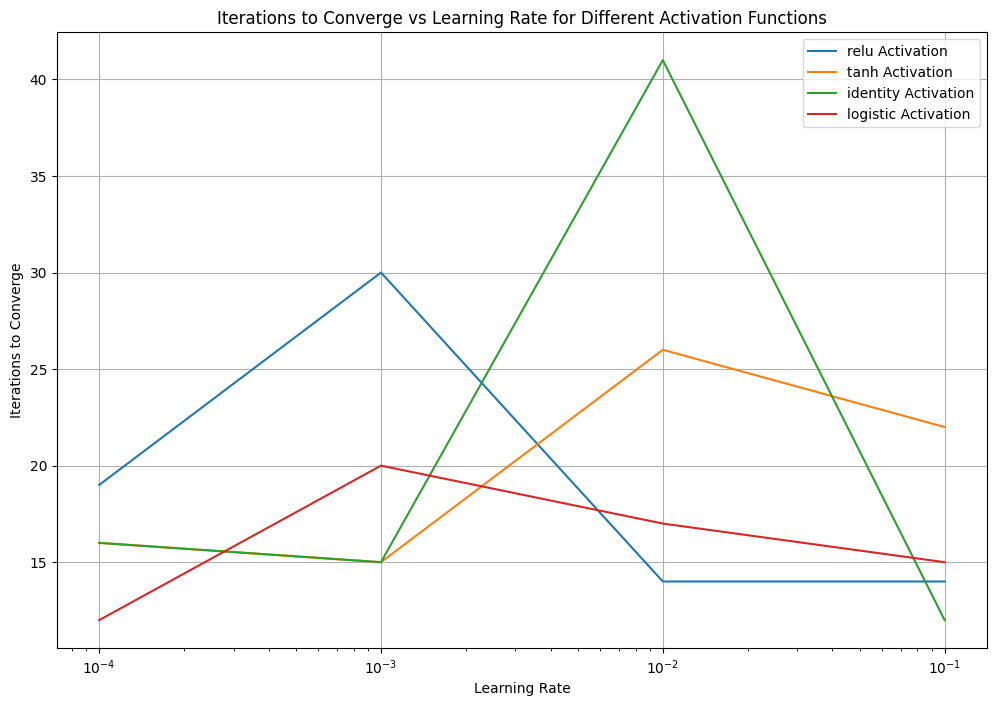

In [8]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Function to load and preprocess the data
def load_and_preprocess_data(file_path):
    df = pd.read_excel(file_path)

    # Check for the presence of the target column and create if it doesn't exist
    if 'Target' not in df.columns:
        df['Target'] = np.random.randint(0, 2, size=len(df))

    # Extract features and target
    english_data = df['ENGLISH'].astype(str)
    hindi_data = df['HINDI'].astype(str)
    target_data = df['Target']

    return english_data, hindi_data, target_data

# Function to apply TF-IDF and create feature vectors
def apply_tfidf(english_data, hindi_data):
    tfidf_vectorizer = TfidfVectorizer()

    # Combine English and Hindi texts into a single list for TF-IDF processing
    combined_data = pd.concat([english_data, hindi_data], ignore_index=True)

    # Fit and transform the combined data
    tfidf_matrix = tfidf_vectorizer.fit_transform(combined_data)

    # Split back into English and Hindi features
    n_english = len(english_data)
    english_tfidf = tfidf_matrix[:n_english]
    hindi_tfidf = tfidf_matrix[n_english:]

    return english_tfidf, hindi_tfidf

# Function to train MLPClassifier and return accuracy and iterations
def train_mlp_classifier(train_features, train_target, test_features, test_target, activation_func, learning_rate, max_iter):
    mlp_model = MLPClassifier(
        hidden_layer_sizes=(100,),
        activation=activation_func,
        max_iter=max_iter,
        learning_rate_init=learning_rate,
        solver='adam',
        random_state=42,
        early_stopping=True,
        n_iter_no_change=10
    )

    mlp_model.fit(train_features, train_target)
    iterations = mlp_model.n_iter_
    predictions = mlp_model.predict(test_features)
    accuracy = accuracy_score(test_target, predictions)

    return accuracy, iterations

# Function to plot iterations vs learning rate
def plot_iterations_vs_learning_rate(learning_rates, iterations_to_converge, activations):
    plt.figure(figsize=(12, 8))
    for activation_func in activations:
        plt.plot(learning_rates, iterations_to_converge[activation_func], label=f'{activation_func} Activation')

    plt.title('Iterations to Converge vs Learning Rate for Different Activation Functions')
    plt.xlabel('Learning Rate')
    plt.ylabel('Iterations to Converge')
    plt.xscale('log')  # Use log scale for the x-axis
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to compare results and train neural network
def main():
    file_path = 'Book1.xlsx'

    # Load and preprocess the data
    english_data, hindi_data, target_data = load_and_preprocess_data(file_path)

    # Apply TF-IDF to the data
    english_tfidf, hindi_tfidf = apply_tfidf(english_data, hindi_data)

    # Concatenate English and Hindi features
    features = np.hstack([english_tfidf.toarray(), hindi_tfidf.toarray()])

    # Ensure features and target have the same number of samples
    if features.shape[0] != len(target_data):
        raise ValueError(f'Feature matrix rows ({features.shape[0]}) do not match target length ({len(target_data)})')

    # Split the data
    train_features, test_features, train_target, test_target = train_test_split(features, target_data, test_size=0.2, random_state=42)

    # Define parameters
    learning_rates = [0.0001, 0.001, 0.01, 0.1]
    activations = ['relu', 'tanh', 'identity', 'logistic']  # 'logistic' is used for sigmoid
    max_iter = 2000  # Maximum iterations for MLPClassifier

    # Dictionary to store the number of iterations taken to converge for each (activation, learning rate) combination
    iterations_to_converge = {act: [] for act in activations}

    # Loop through activation functions and learning rates
    for activation_func in activations:
        print(f"\nActivation Function: {activation_func}")
        for learning_rate in learning_rates:
            accuracy, iterations = train_mlp_classifier(train_features, train_target, test_features, test_target, activation_func, learning_rate, max_iter)
            iterations_to_converge[activation_func].append(iterations)

            print(f"Learning Rate: {learning_rate}, Iterations to Converge: {iterations}, Accuracy: {accuracy:.4f}")

    # Plot the results
    plot_iterations_vs_learning_rate(learning_rates, iterations_to_converge, activations)

# Execute the main function
if __name__ == "__main__":
    main()
